In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
df=pd.read_csv('titanic_data.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [4]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

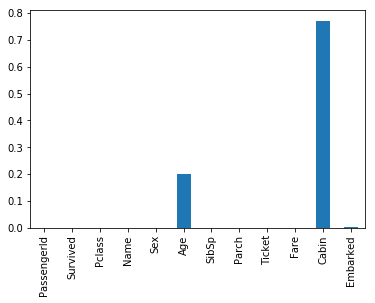

In [5]:
df.isnull().mean().plot(kind='bar')

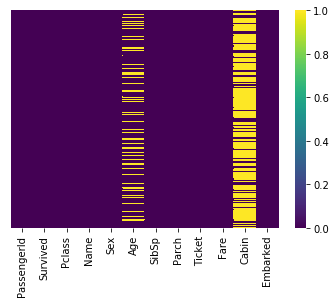

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

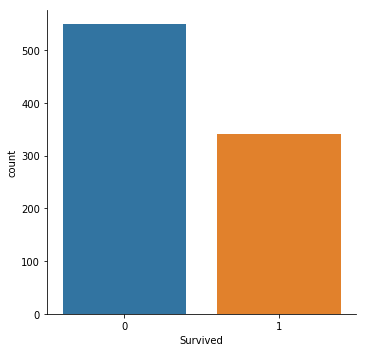

In [24]:
sns.catplot('Survived',kind='count',data=df)

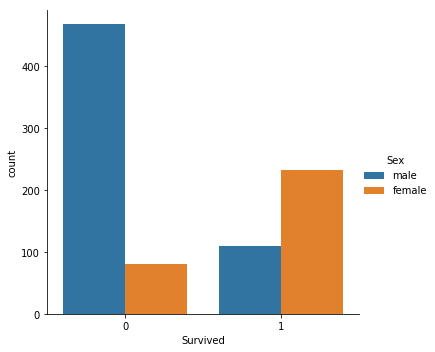

In [26]:
sns.catplot('Survived',kind='count',hue='Sex',data=df)

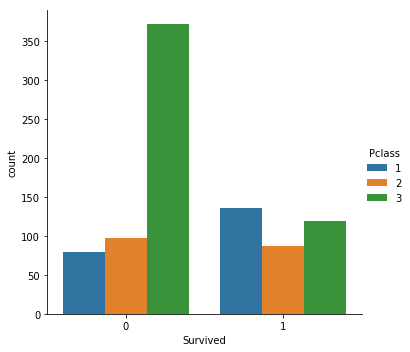

In [28]:
sns.catplot('Survived',kind='count',hue='Pclass',data=df)

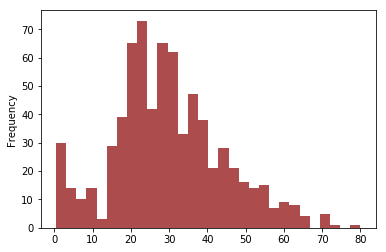

In [16]:
df.Age.plot(kind='hist',bins=30,color='darkred',alpha = 0.7)

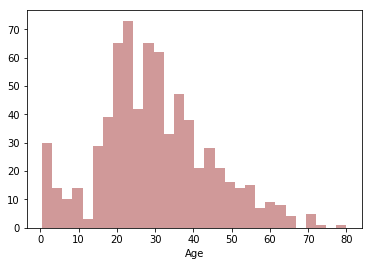

In [14]:
sns.distplot(df['Age'].dropna(),kde=False,bins=30,color = 'darkred')

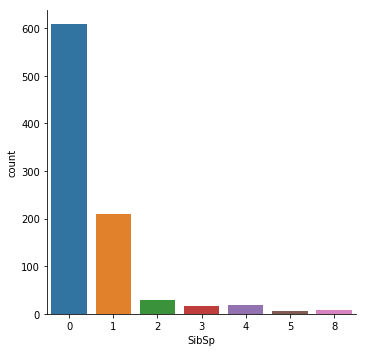

In [18]:
sns.catplot(x='SibSp',data=df,kind='count')

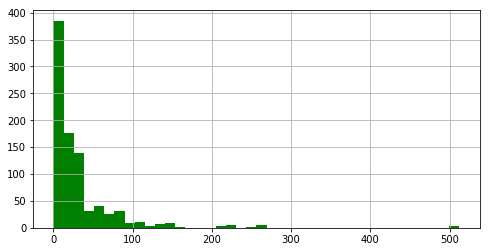

In [22]:
df['Fare'].hist(bins=40,color='green',figsize=(8,4))

____
### Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

In [28]:
import cufflinks as cf
cf.go_offline()

ModuleNotFoundError: No module named 'cufflinks'

In [29]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

AttributeError: 'Series' object has no attribute 'iplot'

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


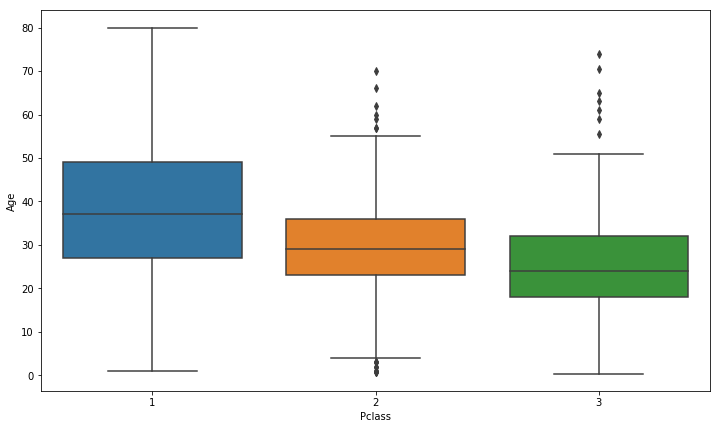

In [29]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df)

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [30]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [32]:
df.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [35]:
df.groupby(['Pclass'])['Age'].mean()[1]

38.233440860215055

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [54]:
Age_mean_val=[38, 29, 25]
def fill_values_to_null():
    for i in df[df['Age'].isnull()]['Pclass']:
        df['Age'][i]=Age_mean_val[df[df['Age'].isnull()]['Pclass']-1]
fill_values_to_null()

TypeError: list indices must be integers or slices, not Series

In [70]:
def impute_args(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 25
    else:
        return Age
df['Age']=df[['Age','Pclass']].apply(impute_args,axis=1)

In [96]:
df.groupby('Pclass')['Age'].transform('mean')

0      25.101670
1      38.090748
2      25.101670
3      38.090748
4      25.101670
5      25.101670
6      38.090748
7      25.101670
8      25.101670
9      29.825163
10     25.101670
11     38.090748
12     25.101670
13     25.101670
14     25.101670
15     29.825163
16     25.101670
17     29.825163
18     25.101670
19     25.101670
20     29.825163
21     29.825163
22     25.101670
23     38.090748
24     25.101670
25     25.101670
26     25.101670
27     38.090748
28     25.101670
29     25.101670
         ...    
861    29.825163
862    38.090748
863    25.101670
864    29.825163
865    29.825163
866    29.825163
867    38.090748
868    25.101670
869    25.101670
870    25.101670
871    38.090748
872    38.090748
873    25.101670
874    29.825163
875    25.101670
876    25.101670
877    25.101670
878    25.101670
879    38.090748
880    29.825163
881    25.101670
882    25.101670
883    29.825163
884    25.101670
885    25.101670
886    29.825163
887    38.090748
888    25.1016

In [95]:
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      25.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     29.0
18     31.0
19     25.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     25.0
27     19.0
28     25.0
29     25.0
       ... 
861    21.0
862    48.0
863    25.0
864    24.0
865    42.0
866    27.0
867    31.0
868    25.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    25.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

Now apply that function!

In [71]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

Now let's check that heat map again!

In [72]:
sns.heatmap(df.isnull())

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [73]:
df.drop('Cabin',axis=1,inplace=True)

KeyError: "['Cabin'] not found in axis"

In [74]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [55]:
sns.heatmap(data=df)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [75]:
df.dropna(inplace=True)

In [76]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

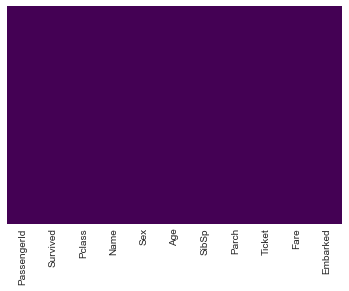

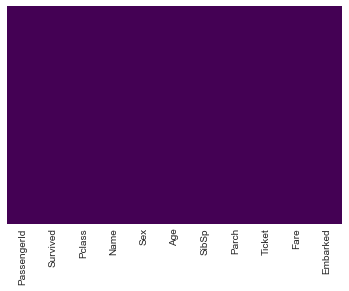

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null int64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(1), int64(6), object(4)
memory usage: 83.3+ KB


In [ ]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [64]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [78]:
df2=pd.get_dummies(df)

In [79]:
df2.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [84]:
x = df2.drop('Survived',axis=1)
y = df2['Survived']

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=77)

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
logmodel = LogisticRegression()

## Training and Predicting

In [88]:
logmodel.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
predictions = logmodel.predict(x_test)

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
confusion_matrix(y_test,predictions)

array([[144,  10],
       [ 33,  80]], dtype=int64)

In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       154
           1       0.89      0.71      0.79       113

   micro avg       0.84      0.84      0.84       267
   macro avg       0.85      0.82      0.83       267
weighted avg       0.85      0.84      0.84       267



[[151  12]
 [ 36  68]]
